<a href="https://colab.research.google.com/github/vincent0104/CPE-019-CPE32S1/blob/main/Balintongog_Hands_on_Activity_8_1_Saving_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
pip install h5py

In [19]:
!pip install scikeras

# Save Your Neural Network Model to JSON


In [25]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import numpy
import os
import pandas as pd

In [26]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [28]:
# load pima indians dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/WineQT.csv", delimiter=",", skiprows=1)

In [30]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/EMT2/EMT2_8.1/8.1.weights.h5")
print("Saved model to disk")

# later...

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/EMT2/EMT2_8.1/8.1.weights.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

compile_metrics: 0.00%
Saved model to disk
Loaded model from disk
compile_metrics: 0.00%


In [31]:
import json

# path to the model.json file
path_json = "model.json"

# open the json file
with open(path_json, "r") as f:
    # load the contents of the file
    content = json.load(f)

# display the contents of the file
print(content)

{'module': 'keras', 'class_name': 'Sequential', 'config': {'name': 'sequential_9', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': [None, 8], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_9'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_27', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'units': 12, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constra

# Save Your Neural Network Model to YAML

In [38]:
import os
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import numpy as np

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load winequality dataset
dataset = np.genfromtxt("/content/drive/MyDrive/WineQT.csv", delimiter=",", skip_header=1)

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Define the directory path for weights
weights_dir = '/content/drive/MyDrive/EMT2/EMT2_8.1/8.1/'

# Ensure the directory exists
os.makedirs(weights_dir, exist_ok=True)

# serialize weights to HDF5
model.save_weights(os.path.join(weights_dir, "model_json.weights.h5"))
print("Saved model weights to disk")



# load JSON and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights(os.path.join(weights_dir, "model_json.weights.h5"))
print("Loaded model weights from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


compile_metrics: 0.00%
Saved model weights to disk
Loaded model weights from disk
compile_metrics: 0.00%


# Save to a Keras Model

In [39]:
# MLP for Pima Indians Dataset saved to single file
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# load pima indians dataset
dataset = loadtxt("/content/drive/MyDrive/WineQT.csv", delimiter=",", skiprows=1)

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# save model and architecture to single file
model.save("/content/drive/MyDrive/EMT2/EMT2_8.1/8.1/model.h5")
print("Saved model to disk")

compile_metrics: 0.00%
Saved model to disk


# Checkpoint Neural Network Model Improvements

In [44]:
# Checkpoint the weights when validation accuracy improves
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

seed = 42
tf.random.set_seed(seed)

# load pima indians dataset
dataset = np.loadtxt("/content/drive/MyDrive/WineQT.csv", delimiter=",", skiprows=1)

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# create model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# checkpoint
filepath="/content/drive/MyDrive/EMT2/EMT2_8.1/8.1/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)



Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to /content/drive/MyDrive/EMT2/EMT2_8.1/8.1/weights-improvement-01-0.00.keras

Epoch 2: val_accuracy did not improve from 0.00000

Epoch 3: val_accuracy did not improve from 0.00000

Epoch 4: val_accuracy did not improve from 0.00000

Epoch 5: val_accuracy did not improve from 0.00000

Epoch 6: val_accuracy did not improve from 0.00000

Epoch 7: val_accuracy did not improve from 0.00000

Epoch 8: val_accuracy did not improve from 0.00000

Epoch 9: val_accuracy did not improve from 0.00000

Epoch 10: val_accuracy did not improve from 0.00000

Epoch 11: val_accuracy did not improve from 0.00000

Epoch 12: val_accuracy did not improve from 0.00000

Epoch 13: val_accuracy did not improve from 0.00000

Epoch 14: val_accuracy did not improve from 0.00000

Epoch 15: val_accuracy did not improve from 0.00000

Epoch 16: val_accuracy did not improve from 0.00000

Epoch 17: val_accuracy did not improve from 0.00000

Epoch 18: val_

# Loading a Saved Neural Network Model

In [47]:
# How to load and use weights from a checkpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer = 'uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))
# load weights
model.load_weights("/content/drive/MyDrive/EMT2/EMT2_8.1/8.1/weights-improvement-01-0.00.keras")
# Compile model (required to make predictions)
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print("Created model and loaded weights from file")
# load pima indians dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/WineQT.csv", delimiter=",", skiprows=1)

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Created model and loaded weights from file
compile_metrics: 0.00%


# Visualize Model Training History in Keras

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


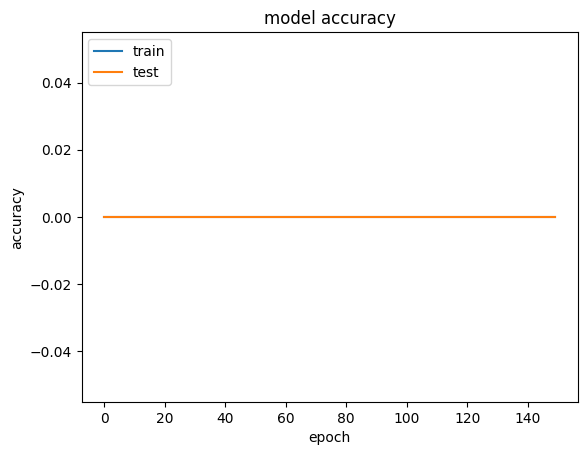

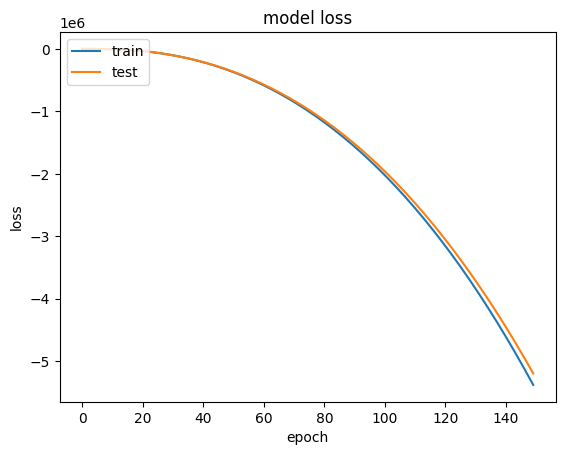

In [48]:
# Visualize training history
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
# load pima indians dataset

dataset = np.loadtxt("/content/drive/MyDrive/WineQT.csv", delimiter=",", skiprows=1)

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Dropout Regularization in Keras

In [49]:
 !pip install scikeras

In [58]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv("/content/drive/MyDrive/EMT2/EMT2_8.1/8.1/Sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout in the input layer with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dropout(0.2, input_shape=(60,)))
	model.add(Dense(60, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: 

Visible: 86.07% (9.13%)


# Using Dropout on the Visible Layer

In [51]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv("/content/drive/MyDrive/EMT2/EMT2_8.1/8.1/Sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout in the input layer with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dropout(0.2, input_shape=(60,)))
	model.add(Dense(60, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: 

Visible: 85.10% (7.33%)


# Using Dropout on Hidden Layers

In [52]:
# Example of Dropout on the Sonar Dataset: Hidden Layer
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv("/content/drive/MyDrive/EMT2/EMT2_8.1/8.1/Sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout in hidden layers with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(60, input_shape=(60,), activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Hidden: 82.74% (6.72%)


# Time-Based Learning Rate Schedule

In [54]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder

# load dataset
dataframe = read_csv("/content/drive/MyDrive/EMT2/EMT2_8.1/8.1/Sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:34].astype(float)
Y = dataset[:,34]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
# create model
model = Sequential()
model.add(Dense(34, input_shape=(34,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/50
5/5 - 2s - 323ms/step - accuracy: 0.0072 - loss: -9.4655e+12 - val_accuracy: 0.0000e+00 - val_loss: -3.8405e+16
Epoch 2/50
5/5 - 0s - 66ms/step - accuracy: 0.0072 - loss: -9.2513e+27 - val_accuracy: 0.0000e+00 - val_loss: -3.7003e+31
Epoch 3/50
5/5 - 0s - 27ms/step - accuracy: 0.0072 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/50
5/5 - 0s - 57ms/step - accuracy: 0.0072 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/50
5/5 - 0s - 18ms/step - accuracy: 0.0072 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/50
5/5 - 0s - 31ms/step - accuracy: 0.0072 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/50
5/5 - 0s - 23ms/step - accuracy: 0.0072 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/50
5/5 - 0s - 25ms/step - accuracy: 0.0072 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 9/50
5/5 - 0s - 14ms/step - accuracy: 0.0072 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 10/50
5

# Drop-Based Learning Rate Schedule

In [55]:
# Drop-Based Learning Rate Decay
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import LearningRateScheduler

# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

# load dataset
dataframe = read_csv("/content/drive/MyDrive/EMT2/EMT2_8.1/8.1/Sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:34].astype(float)
Y = dataset[:,34]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
# create model
model = Sequential()
model.add(Dense(34, input_shape=(34,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
sgd = SGD(learning_rate=0.0, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=28, callbacks=callbacks_list, verbose=2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 - 1s - 181ms/step - accuracy: 0.0144 - loss: -1.0199e+13 - val_accuracy: 0.0000e+00 - val_loss: -4.1598e+16 - learning_rate: 0.1000
Epoch 2/50
5/5 - 0s - 11ms/step - accuracy: 0.0072 - loss: -1.0235e+28 - val_accuracy: 0.0000e+00 - val_loss: -4.1168e+31 - learning_rate: 0.1000
Epoch 3/50
5/5 - 0s - 31ms/step - accuracy: 0.0072 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.1000
Epoch 4/50
5/5 - 0s - 24ms/step - accuracy: 0.0072 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.1000
Epoch 5/50
5/5 - 0s - 15ms/step - accuracy: 0.0072 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.1000
Epoch 6/50
5/5 - 0s - 25ms/step - accuracy: 0.0072 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.1000
Epoch 7/50
5/5 - 0s - 16ms/step - accuracy: 0.0072 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.1000
Epoch 8/50
5/5 - 0s - 26ms/step - accuracy: 0.0072 - loss: nan - val

# Conclusion

In this activity I learned how to build neural networks using TensorFlow and keras, I also applied techniques like dropout regularization to improved the model. I saved models in H5, JSON and YAML formats and checkpointed them to preserve the best-performing versions during training.